In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca file CSV dengan encoding latin1
data = pd.read_csv('/content/drive/MyDrive/DataAnalyst/Looker Studio/Project3/data/adidas.csv')
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


In [3]:
data.shape

(9641, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [5]:
data.isna().sum() / data.shape[0]

Retailer            0.000000
Retailer ID         0.000000
Invoice Date        0.000000
Region              0.000000
State               0.000000
City                0.000000
Product             0.000000
Price per Unit      0.000207
Units Sold          0.000000
Total Sales         0.000000
Operating Profit    0.000000
Sales Method        0.000000
dtype: float64

In [6]:
# drop column have missing value in Price per units columns
data.dropna(subset = "Price per Unit", inplace = True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe(include = object)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9639,9639,9639,9639,9639,9639,9639,9639,9639,9639,9639
unique,6,724,5,50,52,7,94,361,1710,1529,3
top,Foot Locker,1/17/2021,West,California,Portland,Men's Street Footwear,$50.00,225,"10,000","$6,300",Online
freq,2633,77,2446,430,360,1610,674,207,66,39,4889


# Visualization

In [9]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

Retailer

<ipython-input-10-bbab398facca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="Retailer", data=data, order=count_data.index, palette=color_mapping)


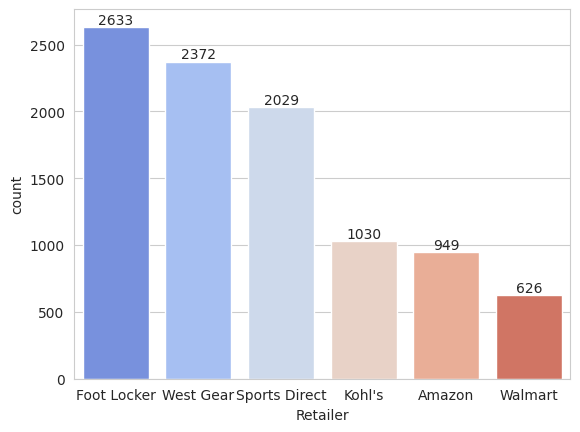

In [10]:
# Menghitung nilai count dari setiap retailer
count_data = data['Retailer'].value_counts()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {retailer: color for retailer, color in zip(count_data.index, palette)}

graph = sns.countplot(x="Retailer", data=data, order=count_data.index, palette=color_mapping)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

Discover Invoice Date column

In [11]:
data["Invoice Date"].unique()[:50]

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020',
       '1/18/2021', '2/11/2021', '6/11/2021', '4/10/2021', '3/16/2021',
       '9/16/2021', '2/21/2021', '10/21/2021', '5/3/2020', '4/19/2020',
       '4/27/2020', '3/10/2021', '10/11/2021', '11/11/2021', '3/4/2020',
       '1/25/2020', '1/7/2020', '1/1/2020', '2/7/2021', '8/22/2021',
       '2/18/2021', '8/11/2021', '4/17/2021', '11/20/2021', '3/16/2020',
       '8/26/2020', '9/1/2020', '1/31/2020', '2/6/2020', '3/17/2020',
       '4/18/2020', '3/15/2020', '3/17/2021', '6/18/2021', '10/18/2021',
       '11/18/2021', '5/12/2021', '9/12/2021', '3/19/2021', '9/19/2021'],
      dtype=object)

In [12]:
# convert data type to date time
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Invoice Date']

0      2021-06-17
1      2021-07-16
2      2021-08-25
3      2021-08-27
4      2021-08-21
          ...    
9636   2021-11-18
9637   2021-10-22
9638   2021-10-22
9639   2021-04-10
9640   2021-10-05
Name: Invoice Date, Length: 9639, dtype: datetime64[ns]

In [13]:
# extract month
data['Month'] = data['Invoice Date'].dt.month
data['Month']

0        6
1        7
2        8
3        8
4        8
        ..
9636    11
9637    10
9638    10
9639     4
9640    10
Name: Month, Length: 9639, dtype: int32

In [14]:
# extract year
data['Year'] = data['Invoice Date'].dt.year
data['Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9636    2021
9637    2021
9638    2021
9639    2021
9640    2021
Name: Year, Length: 9639, dtype: int32

In [15]:
# extract day
data['Day'] = data['Invoice Date'].dt.day
data['Day']

0       17
1       16
2       25
3       27
4       21
        ..
9636    18
9637    22
9638    22
9639    10
9640     5
Name: Day, Length: 9639, dtype: int32

In [16]:
# create season column

def find_seasons(monthNumber):
    if monthNumber in [12, 1, 2]:
        return 'Winter'

    elif monthNumber in [3, 4, 5]:
        return 'Spring'

    elif monthNumber in [6, 7, 8]:
        return 'Summer'

    elif monthNumber in [9, 10, 11]:
        return 'Autumn'

data['Season'] = data['Month'].apply(find_seasons)
data['Season']

0       Summer
1       Summer
2       Summer
3       Summer
4       Summer
         ...  
9636    Autumn
9637    Autumn
9638    Autumn
9639    Spring
9640    Autumn
Name: Season, Length: 9639, dtype: object

In [17]:
# convert mont column to month name
data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.month_name()

In [18]:
# drop Invoice Date, Retailer ID columns
data.drop(columns = ['Retailer ID', 'Invoice Date'], inplace = True)

In [19]:
data.sample(5)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
5961,Sports Direct,Northeast,Massachusetts,Boston,Women's Athletic Footwear,$42.00,51,214,$77,Online,August,2021,14,Summer
3978,West Gear,South,Louisiana,New Orleans,Men's Street Footwear,$34.00,112,381,$206,Online,October,2021,17,Autumn
6860,Amazon,Midwest,Ohio,Columbus,Men's Street Footwear,$45.00,795,"35,775","$14,310",Online,May,2021,9,Spring
4507,West Gear,West,Colorado,Denver,Women's Apparel,$52.00,95,494,$143,Online,April,2020,1,Spring
649,Foot Locker,Northeast,New York,New York,Men's Apparel,$55.00,234,"1,287",$515,Online,January,2020,5,Winter


In [20]:
# convert some column datatype

data["Day"] = data['Day'].astype('category')
# -----------------
data['Season'] = data['Season'].astype('category')
# -----------------
data['Year'] = data['Year'].astype('category')

<ipython-input-21-5c8441b035be>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Season", col="Year", data=data, kind="count", palette=color_mapping, legend=False)


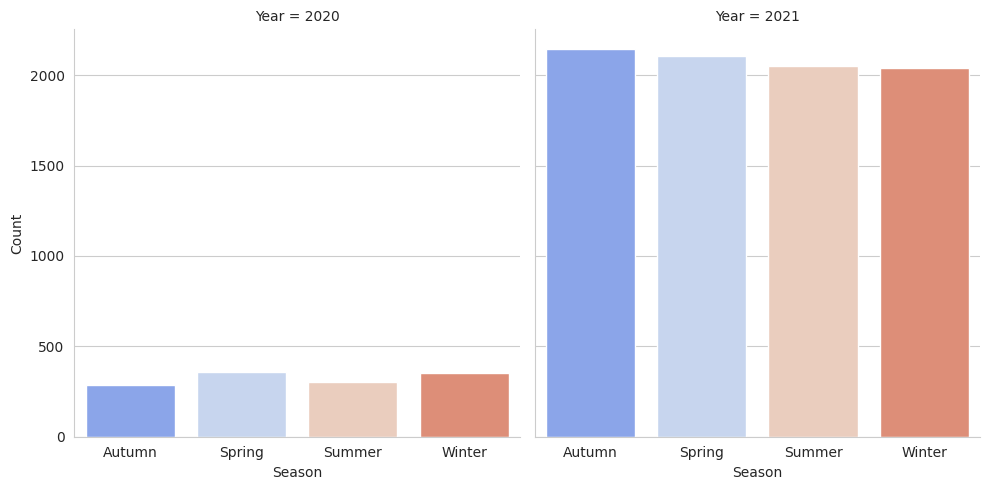

In [21]:
# Menghitung jumlah count dari setiap season
count_data = data['Season'].value_counts().sort_index()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {season: color for season, color in zip(count_data.index, palette)}

# Fungsi untuk menerapkan warna pada tiap bar berdasarkan jumlah count
def apply_colors(ax, **kwargs):
    for patch in ax.patches:
        season = patch.get_x() + patch.get_width() / 2
        for season_name, color in color_mapping.items():
            if season_name == patch.get_x():
                patch.set_facecolor(color)

# Plot
g = sns.catplot(x="Season", col="Year", data=data, kind="count", palette=color_mapping, legend=False)
g.set_axis_labels("Season", "Count")

# Terapkan warna pada tiap subplot
for ax in g.axes.flat:
    apply_colors(ax)

plt.show()

<ipython-input-22-6b529a7adce3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Season", col="Year", data=data, kind="count", palette=color_mapping, legend=False, height=4, aspect=1)


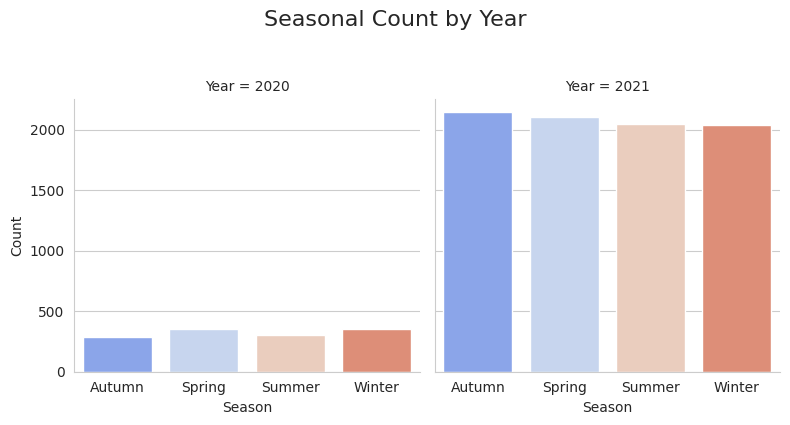

In [22]:
# Menghitung jumlah count dari setiap season
count_data = data['Season'].value_counts().sort_index()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {season: color for season, color in zip(count_data.index, palette)}

# Fungsi untuk menerapkan warna pada tiap bar berdasarkan jumlah count
def apply_colors(ax, **kwargs):
    for patch in ax.patches:
        season = patch.get_x() + patch.get_width() / 2
        for season_name, color in color_mapping.items():
            if season_name == patch.get_x():
                patch.set_facecolor(color)

# Plot
g = sns.catplot(x="Season", col="Year", data=data, kind="count", palette=color_mapping, legend=False, height=4, aspect=1)
g.set_axis_labels("Season", "Count")
g.fig.suptitle('Seasonal Count by Year', y=1.05, fontsize=16)

# Terapkan warna pada tiap subplot
for ax in g.axes.flat:
    apply_colors(ax)

plt.tight_layout()
plt.show()

## Discover Region column

In [23]:
data['Region'].unique()

array(['Southeast', 'South', 'Midwest', 'Northeast', 'West'], dtype=object)

<ipython-input-24-889ef1c8cabb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='Count', data=count_data, palette=palette)


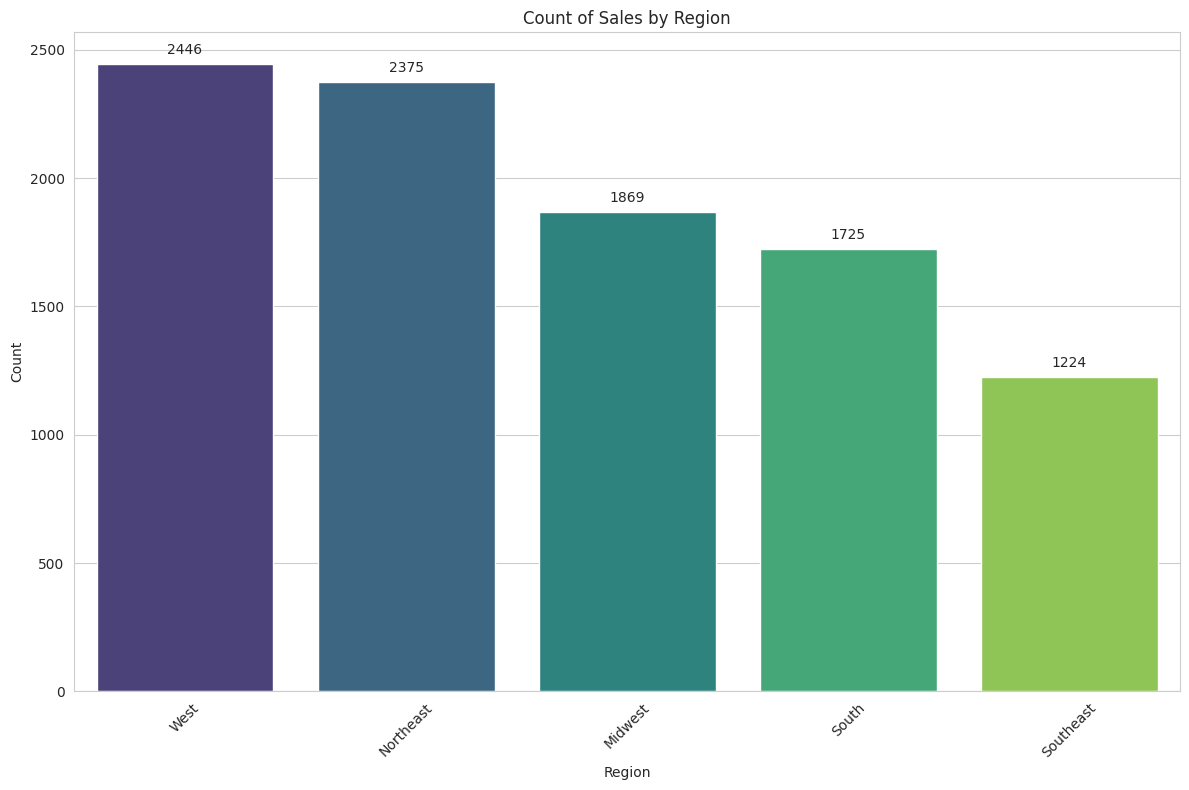

In [24]:
# Menghitung jumlah data untuk setiap region
count_data = data['Region'].value_counts().reset_index()
count_data.columns = ['Region', 'Count']

# Menggunakan palette viridis
palette = sns.color_palette("viridis", len(count_data))

# Plot dengan barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Region', y='Count', data=count_data, palette=palette)

# Menambahkan label jumlah data di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Menambahkan label untuk sumbu
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Sales by Region')

# Mengatur ticks pada sumbu y dengan kelipatan 500
y_max = count_data['Count'].max()
y_ticks = np.arange(0, y_max + 500, 500)
plt.yticks(y_ticks, labels=[f'{int(y_tick)}' for y_tick in y_ticks])

plt.tight_layout()
plt.show()

<ipython-input-25-cc9decd2b964>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="Region", data=data, order=count_data.index, palette=color_mapping)


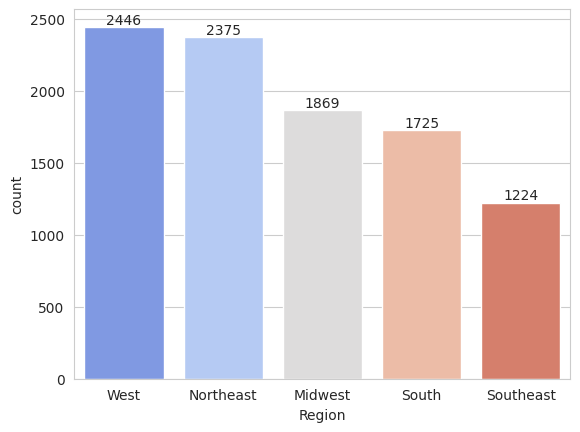

In [25]:
# Menghitung nilai count dari setiap retailer
count_data = data['Region'].value_counts()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {retailer: color for retailer, color in zip(count_data.index, palette)}

graph = sns.countplot(x="Region", data=data, order=count_data.index, palette=color_mapping)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

## Discover State column

In [26]:
data['State'].unique()

array(['Florida', 'Louisiana', 'Alabama', 'Missouri', 'Mississippi',
       'Wisconsin', 'New York', 'Michigan', 'Utah', 'Ohio', 'Arkansas',
       'Georgia', 'Texas', 'Oklahoma', 'West Virginia', 'California',
       'South Carolina', 'Kansas', 'Tennessee', 'North Carolina', 'Idaho',
       'Indiana', 'New Jersey', 'Oregon', 'South Dakota', 'North Dakota',
       'Iowa', 'Maryland', 'Delaware', 'Washington', 'Virginia',
       'Wyoming', 'Minnesota', 'Kentucky', 'Connecticut', 'Rhode Island',
       'Massachusetts', 'New Mexico', 'Nevada', 'Illinois', 'Nebraska',
       'Maine', 'Arizona', 'Vermont', 'New Hampshire', 'Hawaii',
       'Montana', 'Colorado', 'Pennsylvania', 'Alaska'], dtype=object)

In [27]:
data['State'].nunique()

50

<ipython-input-28-48f083e122c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "RdBu")


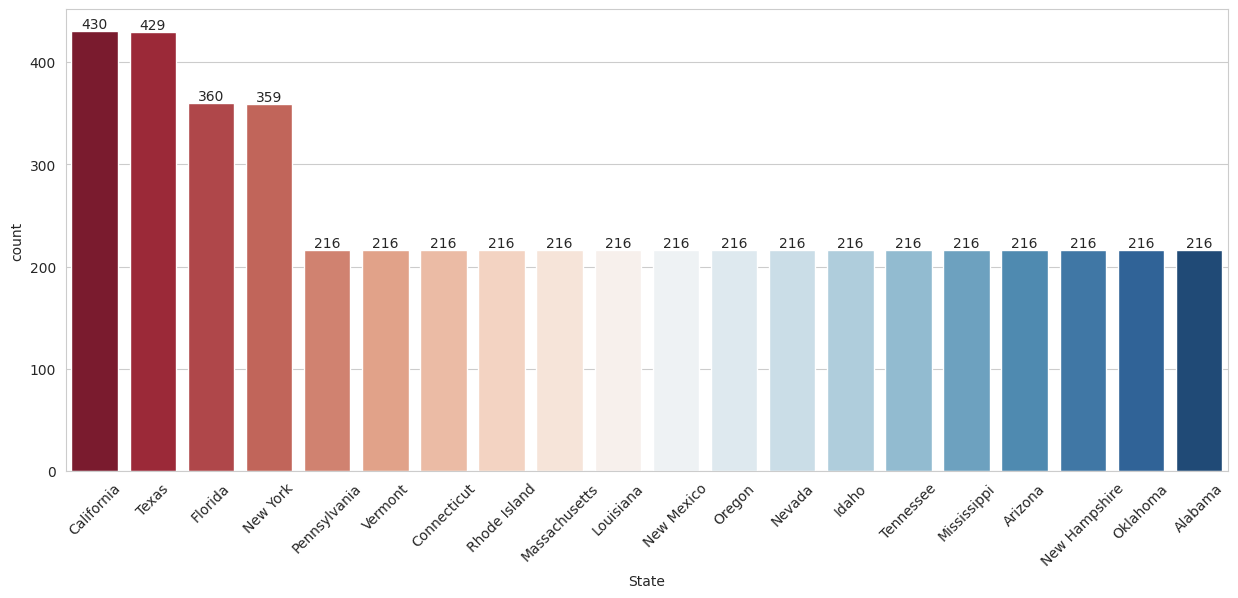

In [28]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

## Discover City column

In [29]:
data['City'].unique()

array(['Orlando', 'New Orleans', 'Birmingham', 'St. Louis', 'Jackson',
       'Milwaukee', 'New York', 'Detroit', 'Salt Lake City', 'Columbus',
       'Little Rock', 'Atlanta', 'Houston', 'Oklahoma City', 'Charleston',
       'San Francisco', 'Dallas', 'Wichita', 'Miami', 'Knoxville',
       'Los Angeles', 'Charlotte', 'Boise', 'Indianapolis', 'Newark',
       'Portland', 'Sioux Falls', 'Fargo', 'Des Moines', 'Baltimore',
       'Wilmington', 'Seattle', 'Richmond', 'Albany', 'Cheyenne',
       'Minneapolis', 'Louisville', 'Hartford', 'Providence', 'Boston',
       'Albuquerque', 'Las Vegas', 'Chicago', 'Omaha', 'Phoenix',
       'Burlington', 'Manchester', 'Honolulu', 'Billings', 'Denver',
       'Philadelphia', 'Anchorage'], dtype=object)

In [30]:
data['City'].nunique()

52

In [31]:
!pip install geopy

<ipython-input-41-72109ebd82ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "GnBu")


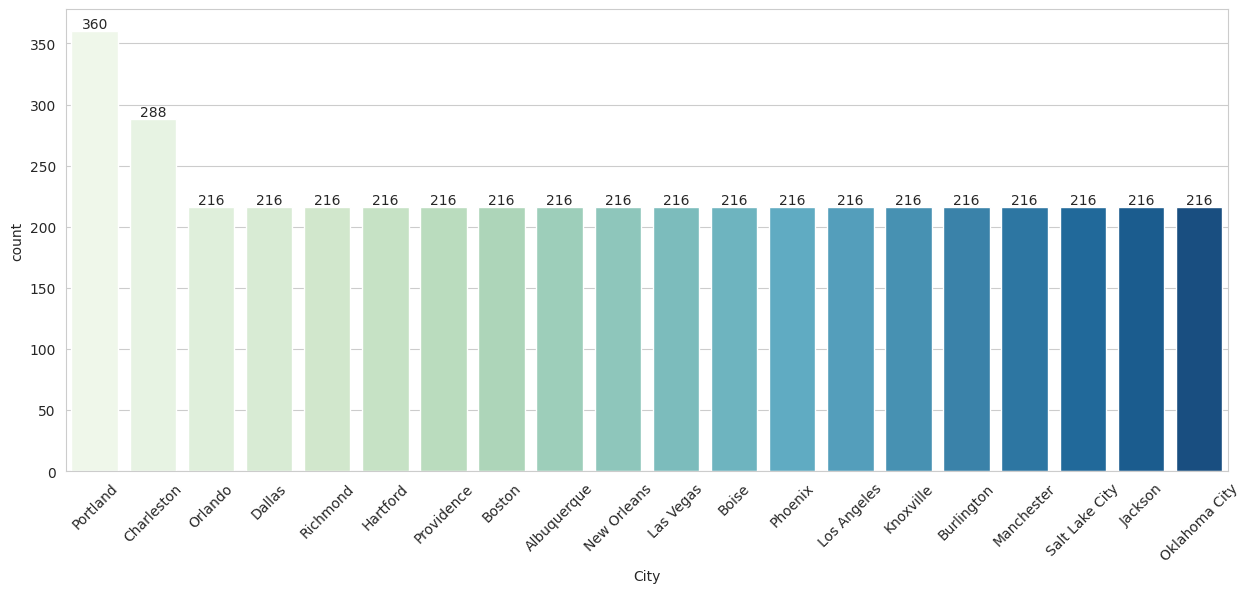

In [41]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "GnBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

## Discover Product column

In [42]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

7
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [43]:
# replace replace <Men's aparel> with <Men's Apparel>

data['Product'] = data['Product'].replace("Men's aparel", "Men's Apparel")

In [44]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

6
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


<ipython-input-46-bcacc7c766ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(y="Product", data=data, order=count_data.index, palette=[color_mapping[x] for x in count_data.index])


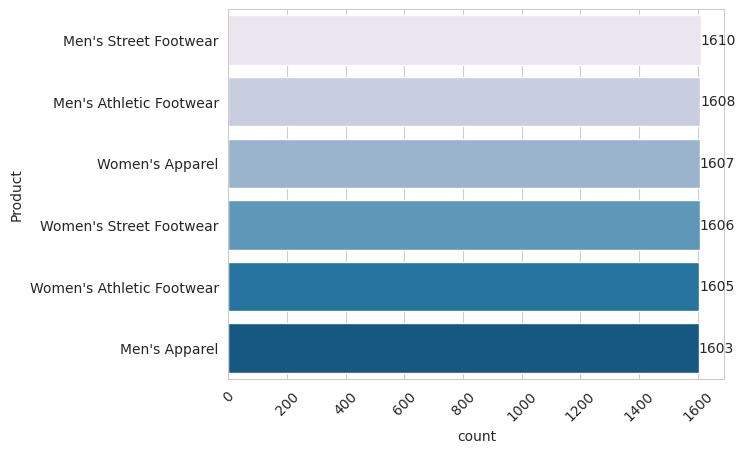

In [46]:
count_data = data['Product'].value_counts().iloc[:20]
palette = sns.color_palette("PuBu", len(count_data))
color_mapping = {product: color for product, color in zip(count_data.index, palette)}
graph = sns.countplot(y="Product", data=data, order=count_data.index, palette=[color_mapping[x] for x in count_data.index])

for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation=45)
plt.show()

modify the data to equivalent values, such as “Men’s Street Footwear” and “Men’s Athletic Footwear” but after knowing the price for each of them.

In [47]:
data['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [48]:
# remove $

def removeDollarSign(price):
    return price.replace('$', '')

data['Price per Unit'] = data['Price per Unit'].apply(removeDollarSign)
data['Price per Unit']

0       103.00 
1       103.00 
2        10.00 
3        15.00 
4        15.00 
         ...   
9636     65.00 
9637     65.00 
9638     75.00 
9639     65.00 
9640     65.00 
Name: Price per Unit, Length: 9639, dtype: object

In [49]:
# convert data type to numeric

data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors = 'coerce')

In [50]:
# check nan value after assign error equal to "coerce"

data['Price per Unit'].isna().sum()

0

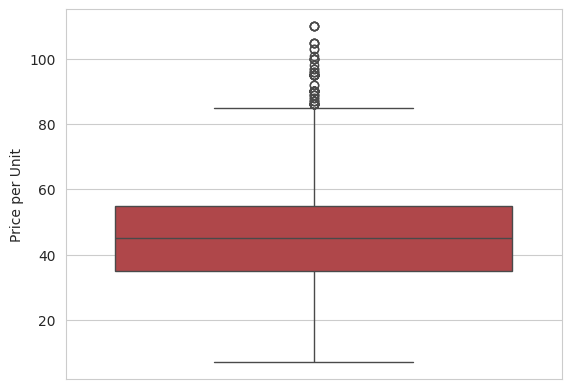

In [51]:
sns.boxplot(y = 'Price per Unit', data = data)
plt.show()

Some people may think that the column has outliers, but the values are correct for the types of sales

## Discover Units Sold column

In [52]:
data['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [53]:
# replace comma with empty string

def replace_comma(Unit):
    return Unit.replace(',', '')

data['Units Sold'] = data['Units Sold'].apply(replace_comma)

In [54]:
# check comma removed or not

data['Units Sold'].unique()[-50:]

array(['1250', '1220', '1200', '1150', '1125', '1075', '975', '925',
       '900', '875', '650', '600', '1100', '1070', '1050', '1045', '1025',
       '1020', '1000', '950', '945', '920', '870', '850', '825', '820',
       '800', '795', '775', '770', '745', '725', '720', '695', '675',
       '670', '645', '625', '620', '595', '570', '550', '545', '525',
       '520', '500', '495', '470', '445', '395'], dtype=object)

In [55]:
# convert data type to integer

data['Units Sold'] = data['Units Sold'].astype('int')

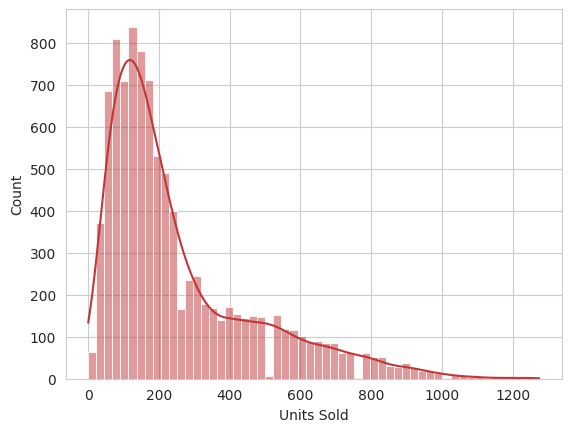

In [56]:
sns.histplot(data = data, x = "Units Sold", kde=True)
plt.show()

In [57]:
# show rows contain zero in Units Sold column

data[data["Units Sold"] == 0]

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
6529,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35.0,0,0,$0,Outlet,June,2021,5,Summer
6530,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30.0,0,0,$0,Outlet,June,2021,11,Summer
6531,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33.0,0,0,$0,Online,June,2021,5,Summer
6532,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27.0,0,0,$0,Online,June,2021,11,Summer


Sales may have been returned by customer and money was refunded to him

In [58]:
# drop rows contain zero

data = data[data['Units Sold'] != 0]

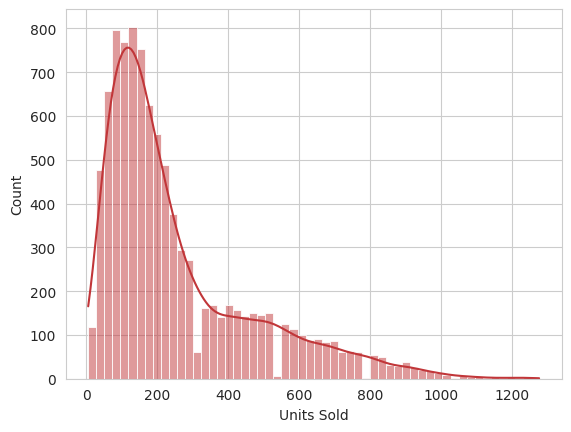

In [59]:
# visualized Units Sold column after fix inconsistent values

sns.histplot(x = "Units Sold", data = data, kde = True)
plt.show()

## Discover Total Sales column

In [60]:
data['Total Sales'].unique()

array(['2,245', '1,679', '7,000', ..., '9,900', '11,700', '10,725'],
      dtype=object)

In [61]:
# replace comma with empty string

data['Total Sales'] = data['Total Sales'].apply(replace_comma) # replace_comma function i created it above

<ipython-input-61-5710823df530>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Sales'] = data['Total Sales'].apply(replace_comma) # replace_comma function i created it above


In [62]:
# convert data type to numeric

data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')

<ipython-input-62-53ab215c071a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')


In [63]:
data.sample(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
8509,Amazon,Northeast,Maine,Portland,Men's Street Footwear,60.0,400,24000.0,"$8,400",Outlet,October,2021,19,Autumn
6140,Amazon,Northeast,Maine,Portland,Women's Athletic Footwear,43.0,44,189.0,$78,Online,November,2021,20,Autumn
1688,Sports Direct,South,Tennessee,Knoxville,Women's Street Footwear,19.0,180,342.0,$185,Online,April,2021,5,Spring


From above some values in "Total Sales" is incorrect And so it some value in "Operating Profit" column in same row is incorrect

In [64]:
# create boll column Correct total column

# 1- Assign column values with total sales column values
data['Correct total'] = data['Total Sales']

# 2- Compare values with correct values
data['Correct total'] = data['Correct total'] == (data['Price per Unit'] * data['Units Sold'])

<ipython-input-64-31c347d1e716>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Correct total'] = data['Total Sales']
<ipython-input-64-31c347d1e716>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Correct total'] = data['Correct total'] == (data['Price per Unit'] * data['Units Sold'])


## Discover Operating Profit column

In [65]:
data['Operating Profit'].unique()

array(['$1,257 ', '$806 ', '$3,150 ', ..., '$4,290 ', '$7,394 ',
       '$2,925 '], dtype=object)

In [66]:
# remove $

data['Operating Profit'] = data['Operating Profit'].apply(removeDollarSign) # removeDollarSign function i created it above
data['Operating Profit']

<ipython-input-66-c0cdd01352bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating Profit'] = data['Operating Profit'].apply(removeDollarSign) # removeDollarSign function i created it above


0       1,257 
1         806 
2       3,150 
3       3,881 
4       3,206 
         ...  
9636    2,438 
9637    2,438 
9638    2,813 
9639    2,925 
9640    2,925 
Name: Operating Profit, Length: 9635, dtype: object

In [67]:
# replace comma with empty string

data['Operating Profit'] = data['Operating Profit'].apply(replace_comma) # replace_comma function i created it above
data['Operating Profit']

<ipython-input-67-11f5033775fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating Profit'] = data['Operating Profit'].apply(replace_comma) # replace_comma function i created it above


0       1257 
1        806 
2       3150 
3       3881 
4       3206 
        ...  
9636    2438 
9637    2438 
9638    2813 
9639    2925 
9640    2925 
Name: Operating Profit, Length: 9635, dtype: object

In [68]:
# convert data type to numeric

data['Operating Profit'] = pd.to_numeric(data['Operating Profit'], errors = 'coerce', downcast = 'float')

<ipython-input-68-e6c00cae0fe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating Profit'] = pd.to_numeric(data['Operating Profit'], errors = 'coerce', downcast = 'float')


In [69]:
# create column

data['profit_percentage'] = (data['Operating Profit'] / data['Total Sales']) * 100

<ipython-input-69-9f6d1ef0d038>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit_percentage'] = (data['Operating Profit'] / data['Total Sales']) * 100


In [70]:
# round values of column

data["profit_percentage"] = data['profit_percentage'].astype('float').round()

<ipython-input-70-ec6e41baf107>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["profit_percentage"] = data['profit_percentage'].astype('float').round()


Correct Total Sales column values

In [71]:
# Correct values

data['Total Sales'] = data['Price per Unit'] * data['Units Sold']

<ipython-input-71-eac93b8167d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Sales'] = data['Price per Unit'] * data['Units Sold']


In [72]:
# calculate profit based on profit percentage column

data['Operating Profit'] = data['Total Sales'] * (data['profit_percentage'] / 100)

<ipython-input-72-f64ed16fab9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating Profit'] = data['Total Sales'] * (data['profit_percentage'] / 100)


## Discover Sales Method column

In [73]:
data['Sales Method'].unique()

array(['Online', 'Outlet', 'In-store'], dtype=object)

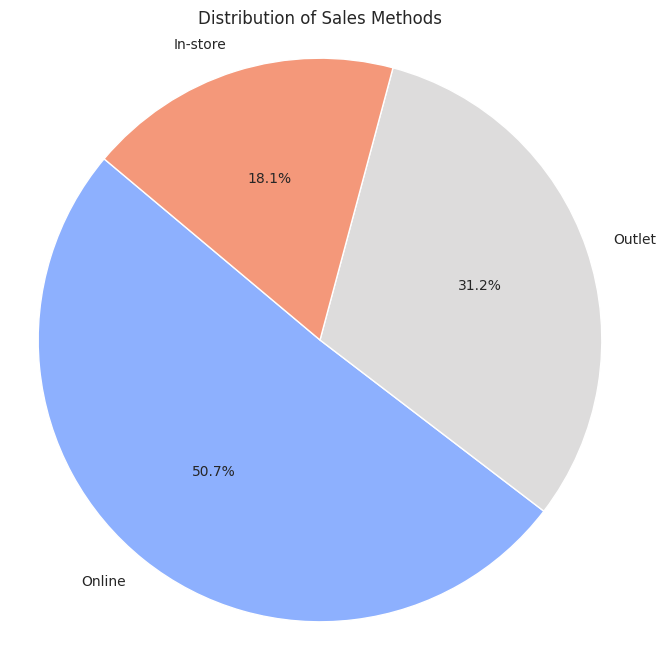

In [75]:
# Menghitung nilai count dari setiap Sales Method
count_data = data['Sales Method'].value_counts()

# Menggunakan palet warna coolwarm dari seaborn
palette = sns.color_palette("coolwarm", len(count_data))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribution of Sales Methods')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

<ipython-input-74-adf716213839>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x="Sales Method", data=data, order=count_data.index, palette=color_mapping)


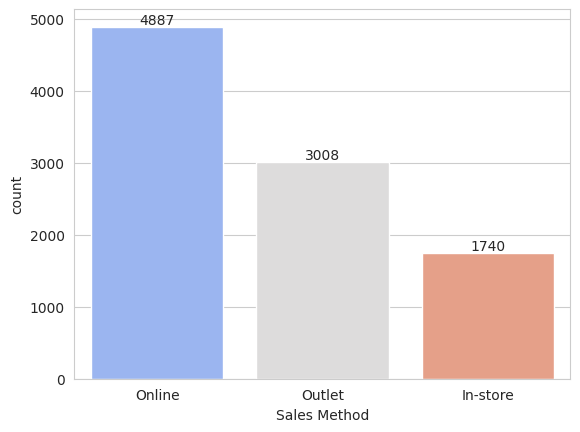

In [74]:
# Menghitung nilai count dari setiap retailer
count_data = data['Sales Method'].value_counts()
palette = sns.color_palette("coolwarm", len(count_data))
color_mapping = {retailer: color for retailer, color in zip(count_data.index, palette)}

graph = sns.countplot(x="Sales Method", data=data, order=count_data.index, palette=color_mapping)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

## Summary :

- Drop rows have missing value in Price per units columns, Because This values are somewhat very small.
- In Invoice Date column i extract some values such as year, month,day and create season column based on month column and i drop it.
- In Product, There were duplicate values due to a spelling error and fixed this.
- In Price per Unit, i remove Dollar Sign and convert data type to numeric.
- In Units Sold, replace comma with empty string and convert data type to integer.

  - ⚠️ During discover this column I found zero values Sales may have been returned by customer and money was refunded to him
  -💡 I decided to drop them
- In Total Sales replace comma with empty string and convert data type to numeric.
  - ⚠️ During discover this column some values in "Total Sales" is incorrect And so it some value in "Operating Profit" column in same row is incorrect
  -💡 I fixed this by using some calculations and adding some columns to help me fix this.
- In Total Sales i remove Dollar Sign,replace comma with empty string and convert data type to numeric.

In [76]:
# Drop some columns that we don't need

data.drop(columns = ['Correct total', 'profit_percentage'], inplace = True)
data.sample(3)

<ipython-input-76-e2be0ffe357d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Correct total', 'profit_percentage'], inplace = True)


,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
5406,Kohl's,Northeast,Delaware,Wilmington,Women's Apparel,33.0,69,2277.0,1252.35,Online,January,2021,10,Winter
2092,West Gear,South,Louisiana,New Orleans,Men's Street Footwear,38.0,168,6384.0,3000.48,Outlet,April,2021,17,Spring
3909,Foot Locker,West,Wyoming,Cheyenne,Men's Street Footwear,27.0,113,3051.0,1403.46,Online,February,2021,24,Winter


# Exploratory Data Analysis

In [77]:
# create groupData function to group each column with Total Sales and Operating Profit

def groupData(columnName):
    return data.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})

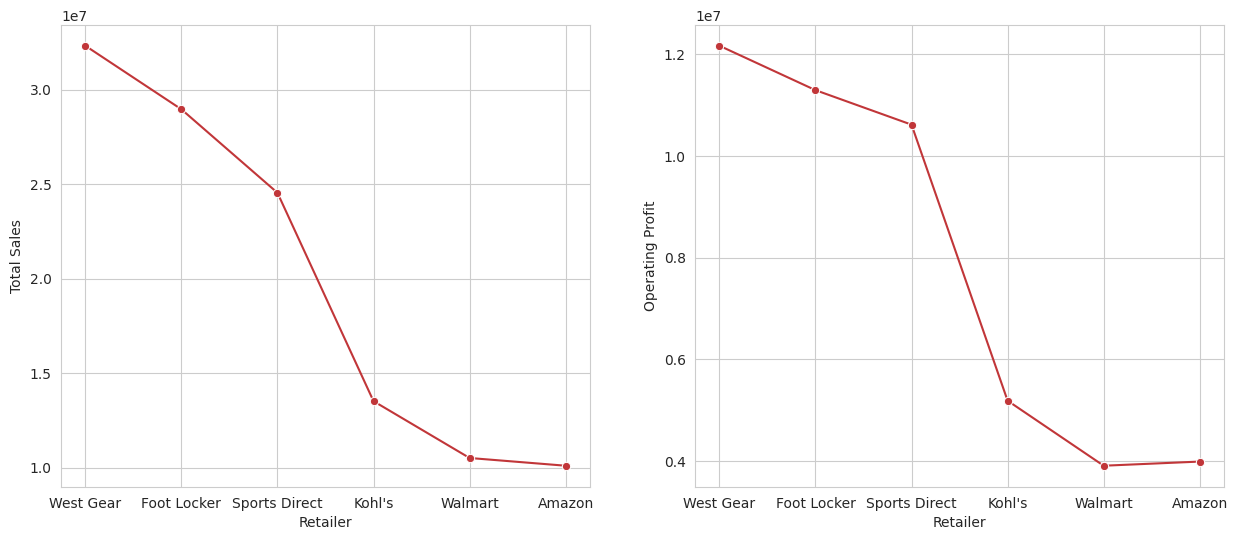

In [78]:
# What is total sales, Operating Profit in each Retailer ?

RetailerSales = groupData('Retailer').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = RetailerSales.index, y = "Total Sales", data = RetailerSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RetailerSales.index, y = "Operating Profit", data = RetailerSales, marker='o')

plt.show()

- West Gear and Foot locker emerge as the top retailers, capturing 27% and 24% of sales, respectively

In [79]:
# Show Total Sales and Operating Profit

RetailerSales['sales percentage'] = (RetailerSales['Total Sales'] / RetailerSales['Total Sales'].sum()) * 100
RetailerSales

,Total Sales,Operating Profit,sales percentage
Retailer,,,
West Gear,32317808.0,12168804.30,26.948288
Foot Locker,28953945.0,11294510.32,24.143322
Sports Direct,24537997.0,10615105.88,20.461072
Kohl's,13512453.0,5182266.02,11.267394
Walmart,10506085.0,3902748.70,8.760526
Amazon,10096987.0,3984437.15,8.419399


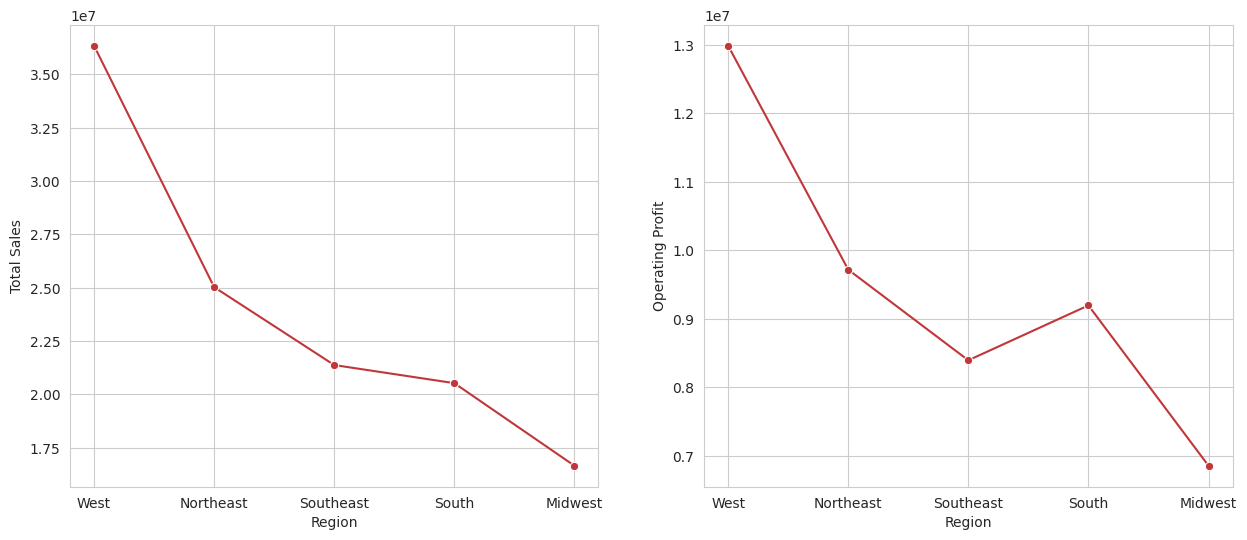

In [80]:
# What is total sales, Operating Profit in each Region ?


RegionSales = groupData('Region').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = RegionSales.index, y = "Total Sales", data = RegionSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RegionSales.index, y = "Operating Profit", data = RegionSales, marker='o')

plt.show()

- West and Northeast emerge as the top Region, capture 30% and 21% of sales respectively.

In [81]:
# Show Total Sales and Operating Profit

RegionSales['sales percentage'] = ((RegionSales['Total Sales'] / RegionSales['Total Sales'].sum()) * 100).round()
RegionSales

,Total Sales,Operating Profit,sales percentage
Region,,,
West,36344407.0,12989521.55,30.0
Northeast,25027267.0,9717495.29,21.0
Southeast,21374436.0,8393057.36,18.0
South,20524731.0,9195085.80,17.0
Midwest,16654434.0,6852712.37,14.0


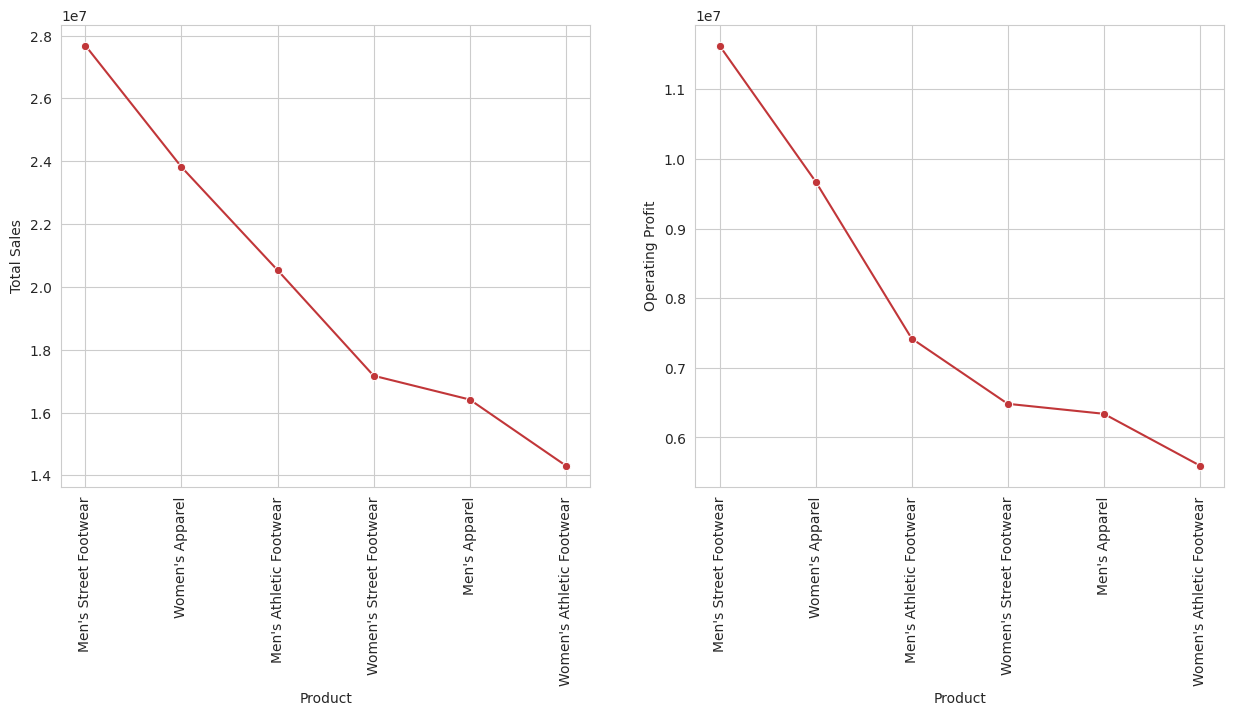

In [82]:
# What is total sales, Operating Profit in each Product ?


ProductSales = groupData('Product').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = ProductSales.index, y = "Total Sales", data = ProductSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = ProductSales.index, y = "Operating Profit", data = ProductSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

- Top product categories such as Men’s Street Footwear, Women’s Apparel, and Men’s Athletic Footwear, which collectively account for 60% of total sales

In [83]:
# Show Total Sales and Operating Profit

ProductSales['sales percentage'] = ((ProductSales['Total Sales'] / ProductSales['Total Sales'].sum()) * 100).round()
ProductSales

,Total Sales,Operating Profit,sales percentage
Product,,,
Men's Street Footwear,27680769.0,11629045.62,23.0
Women's Apparel,23814985.0,9676820.56,20.0
Men's Athletic Footwear,20532180.0,7421729.32,17.0
Women's Street Footwear,17171938.0,6483647.11,14.0
Men's Apparel,16413882.0,6340422.37,14.0
Women's Athletic Footwear,14311521.0,5596207.39,12.0


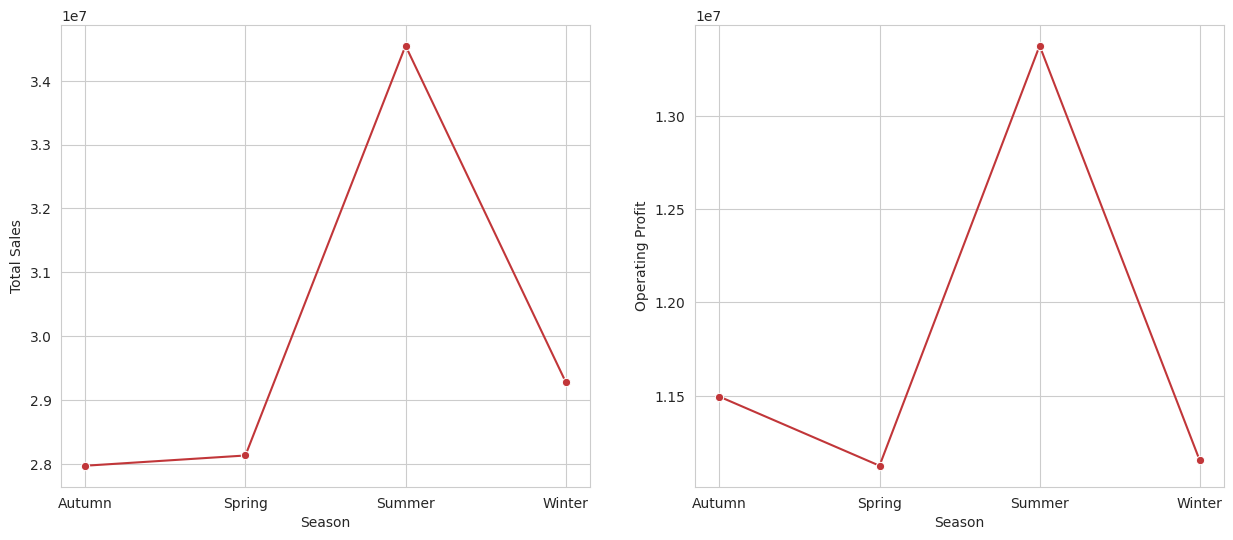

In [84]:
# What is total sales, Operating Profit in each Season ?

SeasonSales = groupData('Season').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SeasonSales.index, y = "Total Sales", data = SeasonSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SeasonSales.index, y = "Operating Profit", data = SeasonSales, marker='o')

plt.show()

- Sales increase in the summer and winter seasons, which represent 29 % and 24% of sales respectively.It may be due to school season or recreational breaks on the beach

In [85]:
# Show Total Sales and Operating Profit

SeasonSales['sales percentage'] = ((SeasonSales['Total Sales'] / SeasonSales['Total Sales'].sum()) * 100).round()
SeasonSales

,Total Sales,Operating Profit,sales percentage
Season,,,
Summer,34548167.0,13378861.05,29.0
Winter,29281202.0,11151361.78,24.0
Spring,28128124.0,11123263.49,23.0
Autumn,27967782.0,11494386.05,23.0


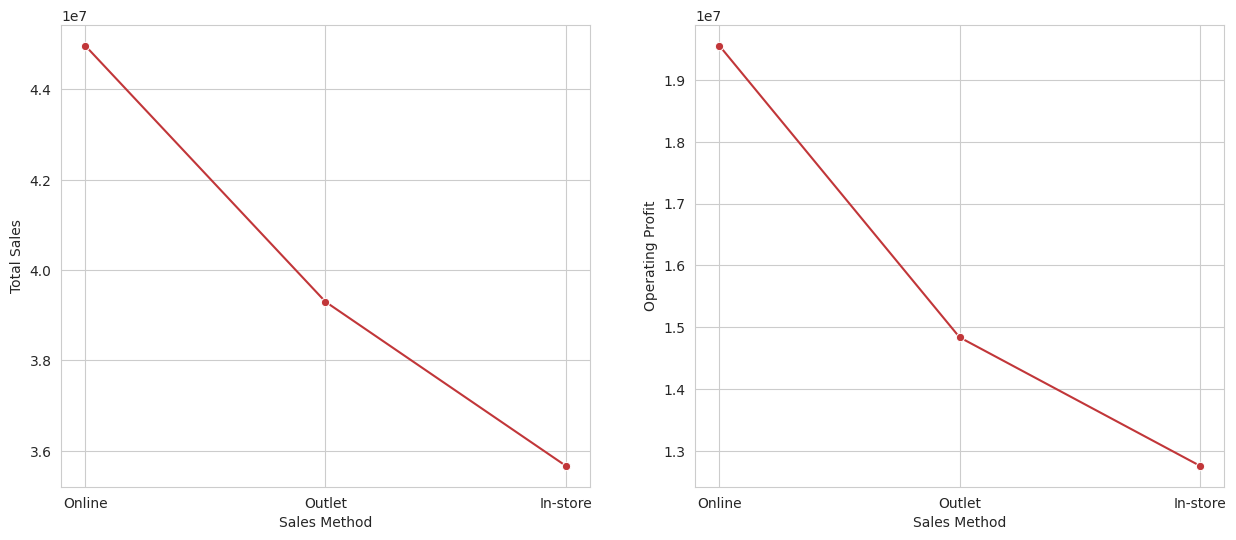

In [86]:
# What is total sales, Operating Profit in each Sales Method ?

SalesMethod = groupData('Sales Method').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SalesMethod.index, y = "Total Sales", data = SalesMethod, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SalesMethod.index, y = "Operating Profit", data = SalesMethod, marker='o')

plt.show()

- The online sales method ranked first with a percentage 37%, followed by Outlet Sales method with a percentage 33%

In [87]:
# Show Total Sales and Operating Profit

SalesMethod['sales percentage'] = ((SalesMethod['Total Sales'] / SalesMethod['Total Sales'].sum()) * 100).round()
SalesMethod

,Total Sales,Operating Profit,sales percentage
Sales Method,,,
Online,44965657.0,19552559.15,37.0
Outlet,39295243.0,14836184.47,33.0
In-store,35664375.0,12759128.75,30.0


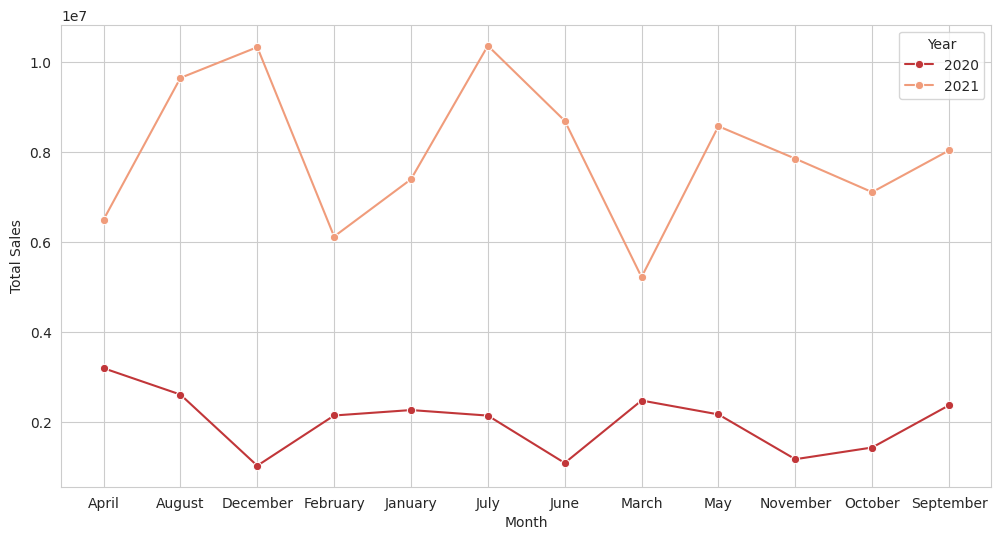

In [88]:
# What is total sales of each year ?

sales_by_month = data.groupby(['Year','Month'])['Total Sales'].sum().reset_index()

# create plot
plt.figure(figsize = (12,6))
sns.lineplot(x = "Month", y = "Total Sales", hue = "Year", data = sales_by_month, marker='o')

plt.show()

- In 2021, sales were much higher than in 2020, and the main reason for this was Covid-19.

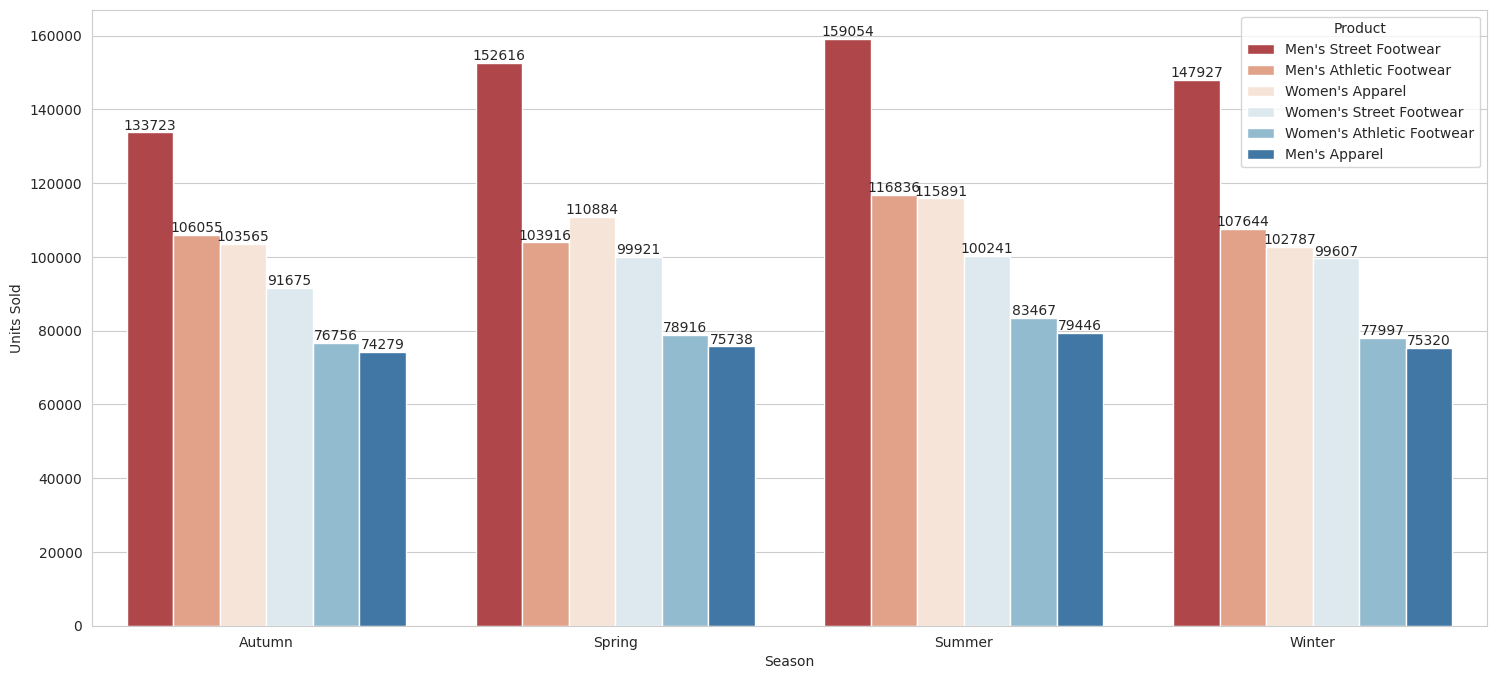

In [89]:
# Does the sale of a particular product increase or decrease during the seasons?

seasonSales = data.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(
                                                                                        by = 'Units Sold', ascending = False)

# create plot
plt.figure(figsize = (18,8))
graph = sns.barplot(x = "Season", y = "Units Sold", hue = 'Product', data = seasonSales)
for container in graph.containers:
    graph.bar_label(container)

plt.show()

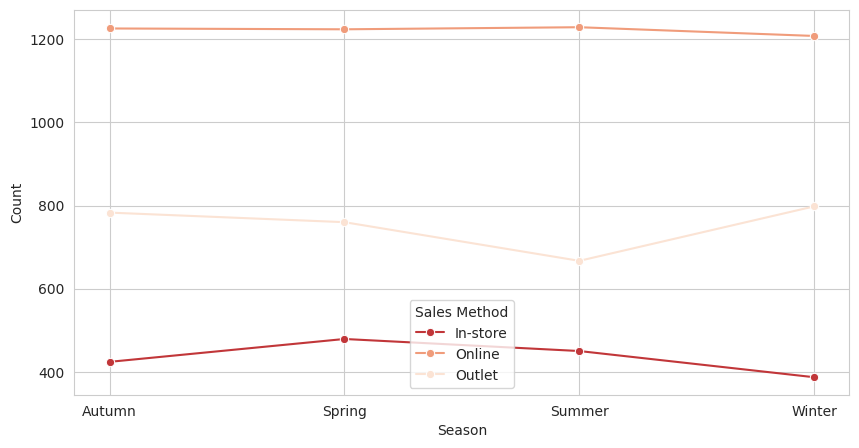

In [90]:
# Does the Sales Method increase or decrease during seasons?

seasonSalesMethod = data.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))

# create plot
plt.figure(figsize = (10,5))
sns.lineplot(x = "Season", y = "Count", hue = 'Sales Method', data = seasonSalesMethod, marker='o')

plt.show()

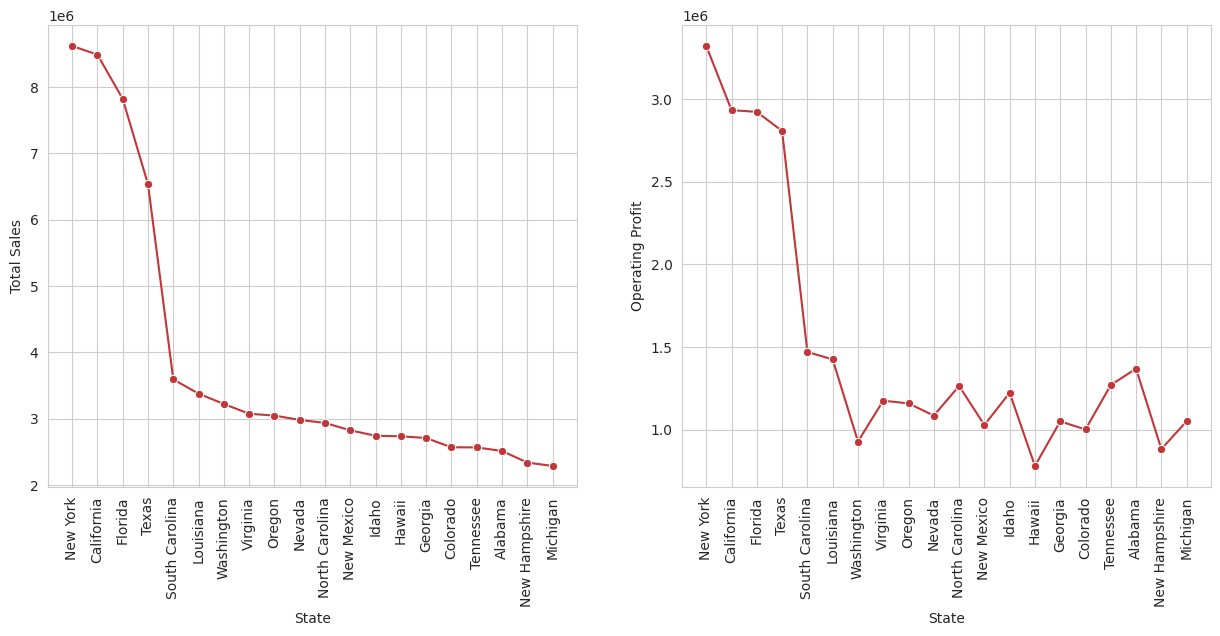

In [91]:
# What is the distribution of sales by top 20 state and city?

stateSales = groupData('State').sort_values(by = 'Total Sales', ascending = False)[:20]

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = stateSales.index, y = "Total Sales", data = stateSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = stateSales.index, y = "Operating Profit", data = stateSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

<ipython-input-92-65c8f84f17e4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Product', y='Price per Unit', data=productsPerUnit, palette=colors)


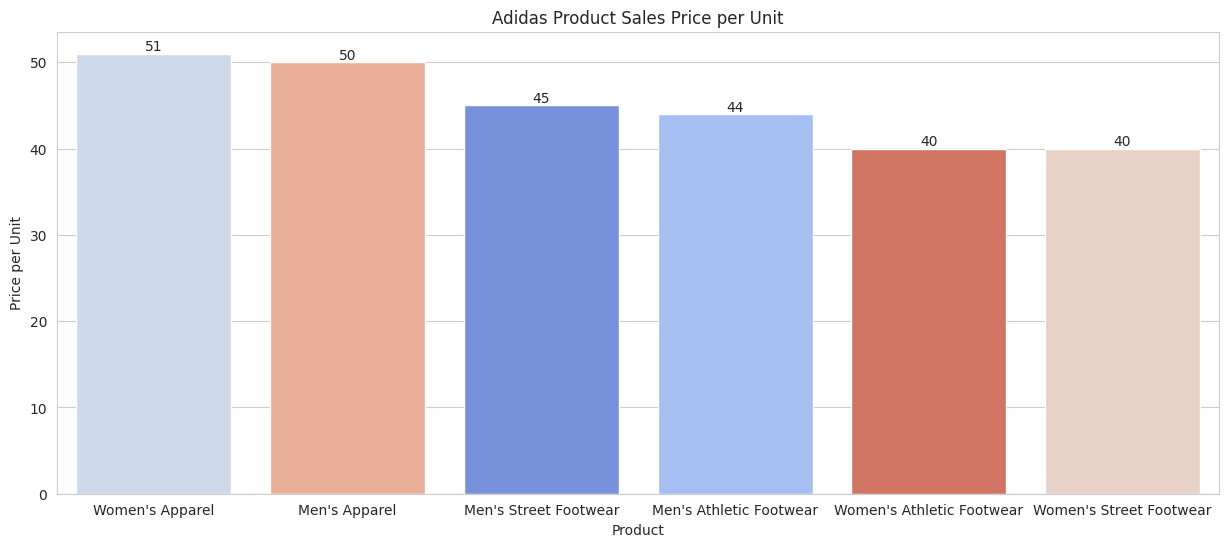

In [92]:
# Menghitung jumlah count dari setiap product
count_data = data['Product'].value_counts()

# Menghitung median price per unit dari setiap product
productsPerUnit = data.groupby('Product')['Price per Unit'].median().reset_index().sort_values(by='Price per Unit', ascending=False)

# Membuat palet warna
palette = sns.color_palette("coolwarm", len(count_data))

# Membuat dictionary untuk mapping warna berdasarkan count
color_mapping = {product: color for product, color in zip(count_data.index, palette)}

# Membuat list warna untuk digunakan pada plot
colors = [color_mapping[product] for product in productsPerUnit['Product']]

# Plot
plt.figure(figsize=(15, 6))
graph = sns.barplot(x='Product', y='Price per Unit', data=productsPerUnit, palette=colors)

# Menambahkan label pada bar
for container in graph.containers:
    graph.bar_label(container)

# Menampilkan plot
plt.title("Adidas Product Sales Price per Unit")
plt.show()